In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal

In [2]:
file = '/home/daniel/Descargas/2019-12-06-1124Z_fossasat-1.wav'
fs, x = scipy.io.wavfile.read(file)
y = scipy.signal.hilbert(x)

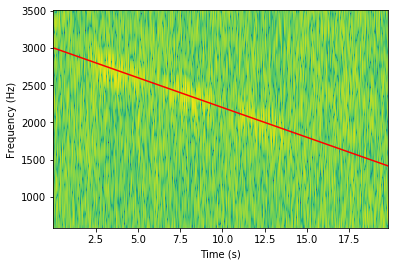

In [3]:
f, t, Sxx = scipy.signal.spectrogram(y, fs, nfft = 2**12, return_onesided=False)
f = np.fft.fftshift(f)
fsel = slice(f.size//2 + 50, f.size//2 + 300)
f = f[fsel]
plt.imshow(np.fft.fftshift(np.log10(Sxx), axes=0)[fsel,:][::-1,:], extent = [t[0],t[-1],f[0],f[-1]], aspect='auto', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
a = -80
b = 3000
plt.plot(t, a * t + b, color = 'red')

In [4]:
freq = a * np.arange(y.size) / fs + b
phase = np.cumsum(freq)/fs
z = y * np.exp(-1j*2*np.pi*(phase - 1500 * np.arange(y.size)/fs))

In [5]:
scipy.io.wavfile.write('/tmp/fossa.wav', 48000, np.round(z.real).astype('int16'))